<a href="https://colab.research.google.com/github/Johnson2209/Artificial-Intellignce/blob/main/Machine_Learning_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Artificial Neural Network - Car Sales Prediction ( A Regression Task)

### Project Overview:

You're working as a car salesman and you would like to build a model that will predict the total dollar amount that customers are willing to pay given the following attributes.

* Customer name
* Customer email
* Country
* Gender
* Age
* Annual Salary
* Credit card debit
* Net worth

The model should predict:
* Car purchase amount

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import DataSet

car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='latin-1')

# New Section

In [9]:
car_df

Customer Name  ... Car Purchase Amount
0      Martina Avila  ...         35321.45877
1      Harlan Barnes  ...         45115.52566
2    Naomi Rodriquez  ...         42925.70921
3    Jade Cunningham  ...         67422.36313
4       Cedric Leach  ...         55915.46248
..               ...  ...                 ...
495           Walter  ...         48901.44342
496            Vanna  ...         31491.41457
497            Pearl  ...         64147.28888
498             Nell  ...         45442.15353
499            Marla  ...         45107.22566

[500 rows x 9 columns]

In [10]:
car_df.head(10)

Customer Name  ... Car Purchase Amount
0    Martina Avila  ...         35321.45877
1    Harlan Barnes  ...         45115.52566
2  Naomi Rodriquez  ...         42925.70921
3  Jade Cunningham  ...         67422.36313
4     Cedric Leach  ...         55915.46248
5     Carla Hester  ...         56611.99784
6   Griffin Rivera  ...         28925.70549
7       Orli Casey  ...         47434.98265
8     Marny Obrien  ...         48013.61410
9    Rhonda Chavez  ...         38189.50601

[10 rows x 9 columns]

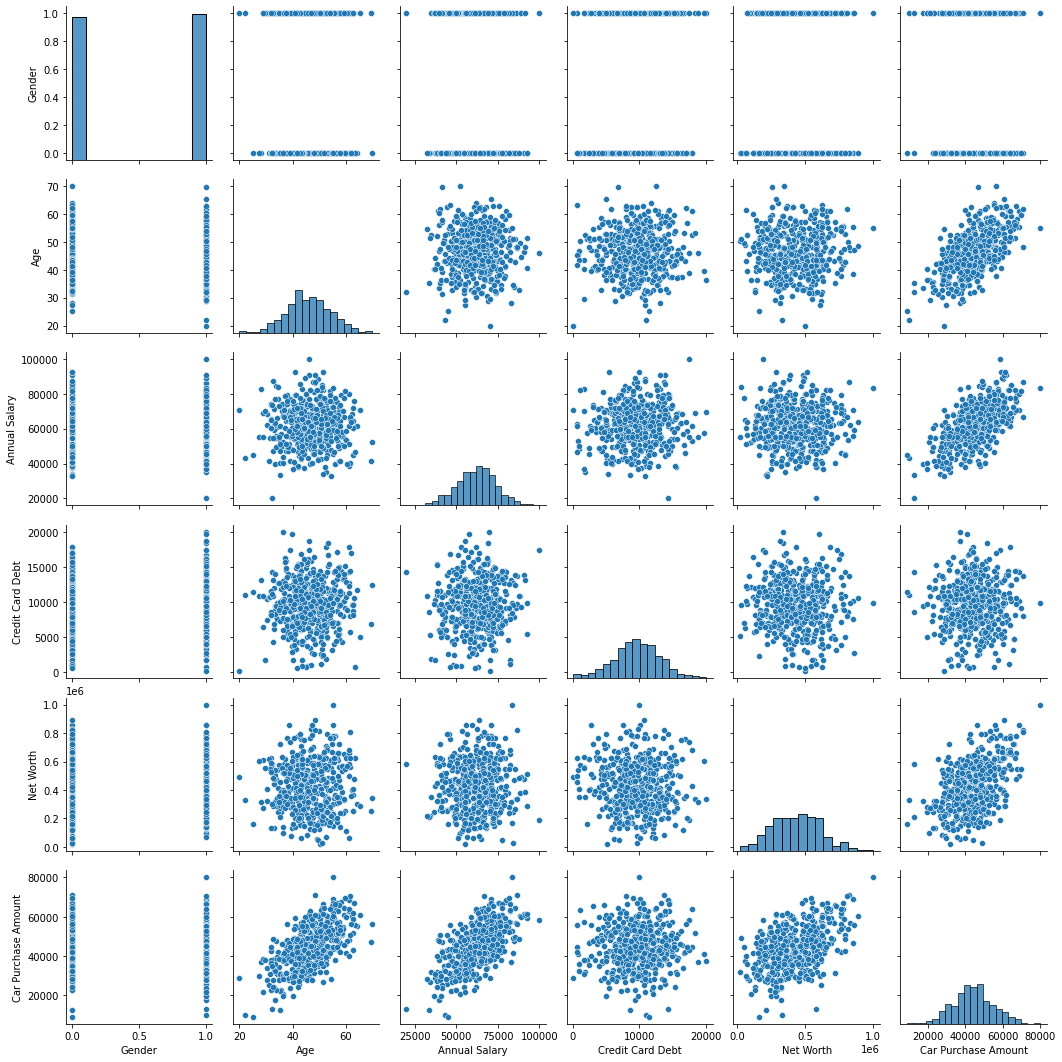

In [11]:
# Visualize Dataset
sns.pairplot(car_df)

In [12]:
# Creating training and testing data set/cleaning data
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis =1)

In [13]:
X

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

In [14]:
y = car_df['Car Purchase Amount']

In [15]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [16]:
X.shape


(500, 5)

In [17]:
y.shape

(500,)

In [18]:
# Normalize the input
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
##! pip install sklearn

In [20]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [21]:
X_scaled.shape

(500, 5)

In [22]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [23]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [24]:
#Normalize the outputs
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)


In [25]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [26]:
X_scaled.shape

(500, 5)

In [27]:
# Train the model
from sklearn.model_selection import train_test_split
#or X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size =0.15) if you dont 
#want to use the default splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [28]:
X_train.shape


(375, 5)

In [29]:
X_test.shape

(125, 5)

In [30]:
# import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim = 5, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [33]:
epoch_hist =model.fit(X_train,y_train, epochs =100, batch_size = 50, verbose =1, validation_split= 0.2)

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 0.2049 - val_loss: 0.1471
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1115 - val_loss: 0.0712
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0264
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.0107
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0129 - val_loss: 0.0102
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 11/100
6/6 [==========

In [34]:
# Evaluating the model
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

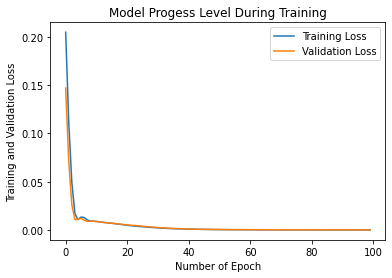

In [35]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title("Model Progess Level During Training")
plt.xlabel("Number of Epoch")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])

In [36]:
# Make prediction
#Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_test = np.array([[1,50,50000,10000, 600000]])
y_predict = model.predict(X_test)

In [37]:
print('Expected Purchase Amount', y_predict)

Expected Purchase Amount [[348776.03]]
